In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import graphviz 
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pydotplus
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')
from sklearn.linear_model import LogisticRegression


In [64]:
analysisData = pd.read_csv("DStraindata.csv")

In [65]:
analysisData.shape

(614, 13)

In [11]:
analysisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [12]:
analysisData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
analysisData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
analysisData['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
analysisData['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [20]:
analysisData['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [21]:
analysisData['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
analysisData['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

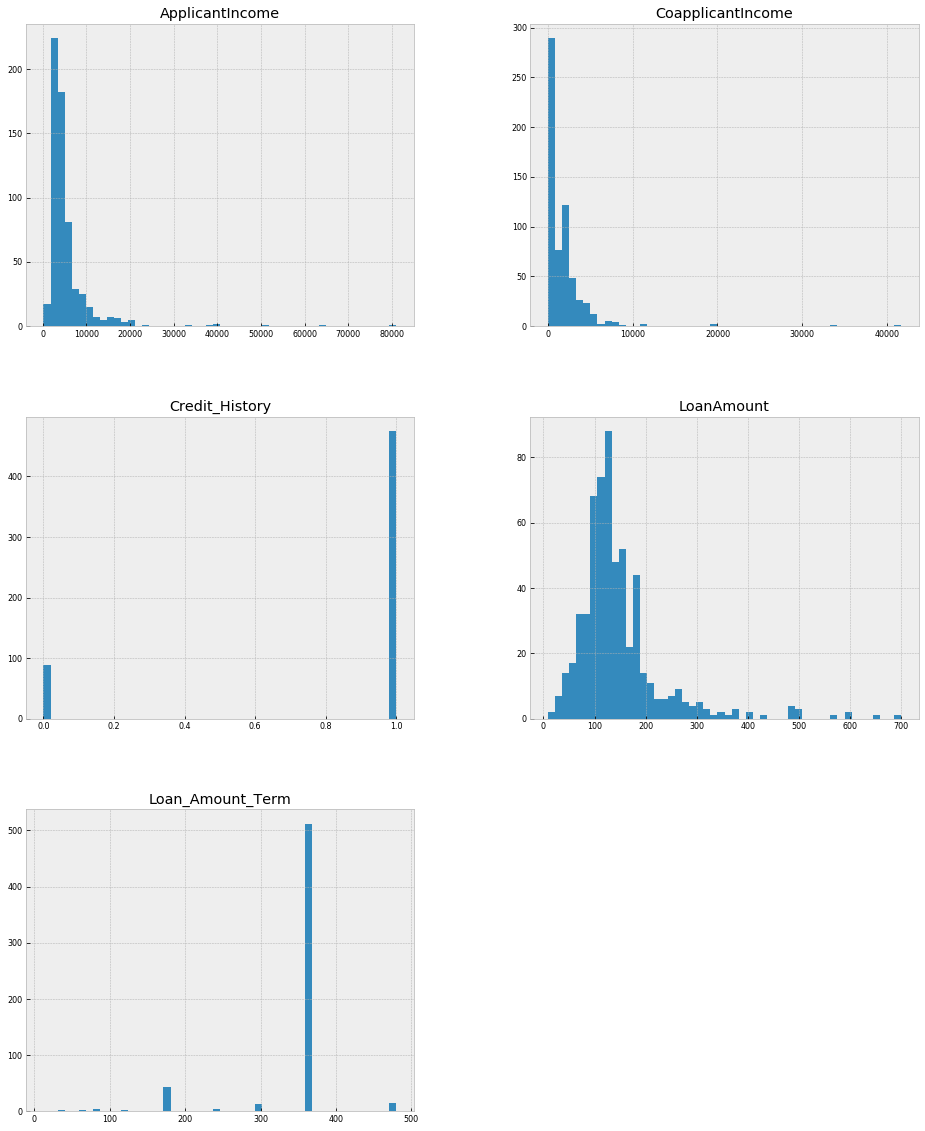

In [34]:
analysisData.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

{'boxes': [<matplotlib.lines.Line2D at 0x1a15ba9dd8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a15bae828>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a15bd24e0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a15bd20b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a15ba9f28>,
  <matplotlib.lines.Line2D at 0x1a15bae400>]}

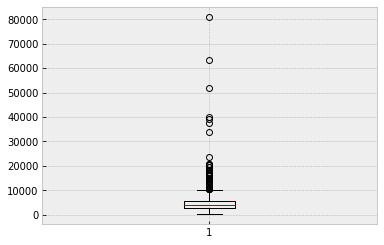

In [35]:
plt.boxplot(analysisData["ApplicantIncome"])

{'boxes': [<matplotlib.lines.Line2D at 0x1a158dbda0>],
 'caps': [<matplotlib.lines.Line2D at 0x1a158c07f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a158d94a8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a158d9080>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a158dbef0>,
  <matplotlib.lines.Line2D at 0x1a158c03c8>]}

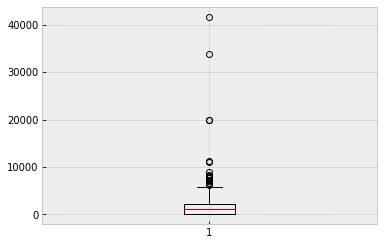

In [36]:
plt.boxplot(analysisData["CoapplicantIncome"])

In [40]:
columns = analysisData.columns
percent_missing = analysisData.isnull().sum() * 100 / len(analysisData)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

In [41]:
missing_value_df

,column_name,percent_missing
Loan_ID,Loan_ID,0.000000
Gender,Gender,2.117264
Married,Married,0.488599
Dependents,Dependents,2.442997
Education,Education,0.000000
Self_Employed,Self_Employed,5.211726
ApplicantIncome,ApplicantIncome,0.000000
CoapplicantIncome,CoapplicantIncome,0.000000
LoanAmount,LoanAmount,3.583062
Loan_Amount_Term,Loan_Amount_Term,2.280130


In [ ]:
#Sort out missing values here

In [43]:
corr = analysisData.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


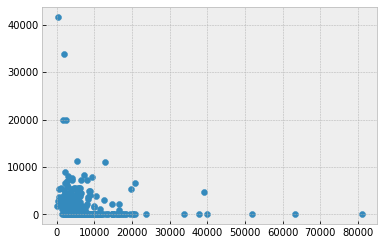

In [44]:
plt.scatter(analysisData.ApplicantIncome, analysisData.CoapplicantIncome);

In [ ]:
plt.scatter(analysisData.ApplicantIncome, analysisData.CoapplicantIncome);

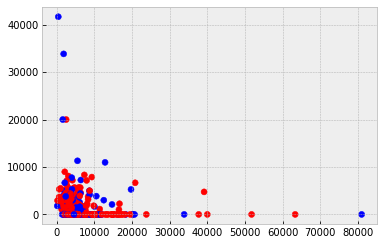

In [45]:
color_map = {'Y': 'red', 'N': 'blue'}
ax = plt.subplot()
x, y = analysisData.ApplicantIncome, analysisData.CoapplicantIncome
colors = analysisData.Loan_Status.map(color_map)
ax.scatter(x, y, color=colors)

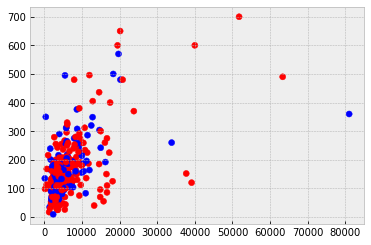

In [46]:
color_map = {'Y': 'red', 'N': 'blue'}
ax = plt.subplot()
x, y = analysisData.ApplicantIncome, analysisData.LoanAmount
colors = analysisData.Loan_Status.map(color_map)
ax.scatter(x, y, color=colors)

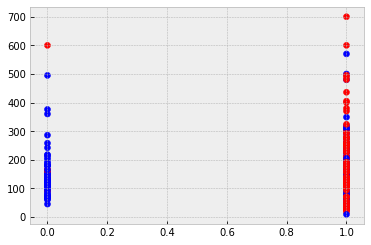

In [47]:
color_map = {'Y': 'red', 'N': 'blue'}
ax = plt.subplot()
x, y = analysisData.Credit_History, analysisData.LoanAmount
colors = analysisData.Loan_Status.map(color_map)
ax.scatter(x, y, color=colors)

In [80]:
analysisData['Loan_Status'] = analysisData['Loan_Status'].map({'Y': 1, 'N': 0})

In [88]:
analysisData['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [81]:
analysisData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [82]:
independent_var = analysisData.drop('Loan_Status', axis=1)  

In [83]:
target_var = analysisData['Loan_Status']  

In [84]:
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20)  

In [85]:
classifier = LogisticRegression(random_state=0)